<a href="https://colab.research.google.com/github/FaizalRahman-ai/Project1/blob/main/FashionMnist%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Basic Classification Classify images of clothing
#first import tensorflow & other helper libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.17.1


In [3]:
#import the fashion Mnist data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#we need to provide the class names for each Lables
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
#We need to Explore the Data
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

10000

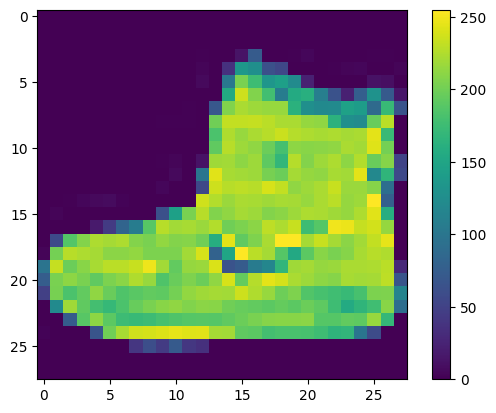

In [7]:
#We need to preprocess the Data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
#Scale the values from 0 to 1 before feeding them the neural network model, & later divide it by 255.0
train_images = train_images / 255.0
test_images = test_images / 255.0

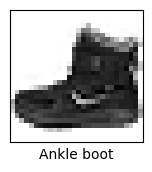

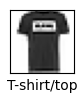

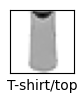

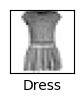

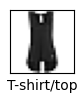

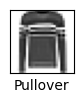

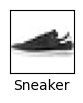

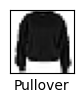

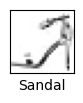

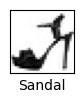

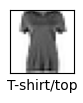

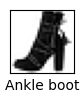

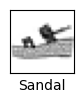

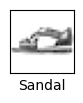

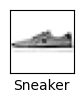

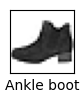

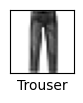

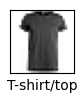

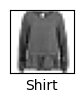

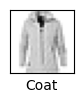

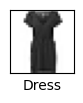

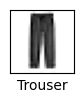

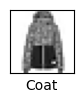

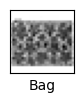

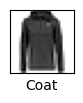

In [10]:
#To verify the data set are in the correct format we need to pull up the first 25 images set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.show()


In [13]:
#Building the Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [16]:
#Compiling the model by using optimizer & Loss function
model.compile(optimizer= 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics = ['accuracy'])

In [17]:
#Training the model, we need to train the model using the given training data, in order to start training call model.fit()
model.fit(train_images, train_labels, epochs =10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7845 - loss: 0.6292
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8640 - loss: 0.3733
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8787 - loss: 0.3328
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8892 - loss: 0.3039
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8927 - loss: 0.2917
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9004 - loss: 0.2742
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9038 - loss: 0.2603
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9077 - loss: 0.2475
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9064 - loss: 0.2467
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9140 - loss: 0.2310


In [18]:
#Evaluate Accuracy
#Compare how the model performs on the dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8824 - loss: 0.3304

Test accuracy: 0.8823999762535095


In [21]:
#Make predictions
probablity_model= tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probablity_model.predict(test_images)
predictions[0]
np.argmax(predictions[10])
test_labels[0]




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


9

array([7.1181819e-07, 1.1839212e-07, 4.0504604e-09, 2.6862529e-10,
       1.0359367e-07, 7.4362487e-04, 2.6574728e-08, 1.2728021e-02,
       3.5665934e-08, 9.8652732e-01], dtype=float32)